# CLASIFICATION AND REGRESSION TREEE ( CART )

In [3]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt 
# Standartlaştırma için eklenen fonksiyonlar scale ve StandartdScaler
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [4]:
df = pd.read_csv("verisetleri\Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.25, random_state=42)

In [4]:
# Tek değişken seçip, bu değişken üzerinden işlemlerimizi devam ettireceğiz

In [5]:
X_train = pd.DataFrame(X_train["Hits"])

In [6]:
X_test = pd.DataFrame(X_test["Hits"])

In [7]:
cart_model = DecisionTreeRegressor()

In [8]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [9]:
# EKSENLERDE GÖRSELLEŞTİRME

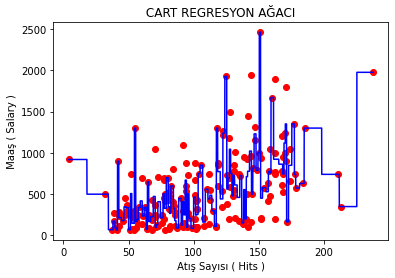

In [9]:
# Grafik için ızgara-grid oluşturma işlemi yapar. X_train setine göre min ve max değerler alınır. 
X_grid = np.arange(min(np.array(X_train)), max(np.array(X_train)), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

# Saçılım grafiği oluşturur
plt.scatter(X_train, y_train, color='red')

# Grid üzerinde modele ilişkin bilgilerin görselleştirilmesi
plt.plot(X_grid, cart_model.predict(X_grid), color='blue')

plt.title(' CART REGRESYON AĞACI ')
plt.xlabel(' Atış Sayısı ( Hits ) ')
plt.ylabel(' Maaş ( Salary ) ');

In [14]:
# DALLANMA KONTROLÜ İLE MODELİN YENİDEN OLUŞTURULMASI

In [10]:
cart_model_with_node = DecisionTreeRegressor(max_leaf_nodes=10)

In [11]:
cart_model_with_node.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

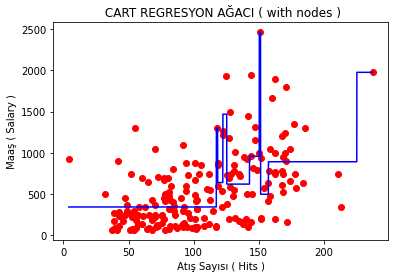

In [12]:
X_grid = np.arange(min(np.array(X_train)), max(np.array(X_train)), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X_train, y_train, color='red')

plt.plot(X_grid, cart_model_with_node.predict(X_grid), color='blue')

plt.title(' CART REGRESYON AĞACI ( with nodes )')
plt.xlabel(' Atış Sayısı ( Hits ) ')
plt.ylabel(' Maaş ( Salary ) ');

In [20]:
# X ekseninde çizilen çizgilerin altında ve üstünde kalan noktaların ortalamaları alınarak bağımlı değşkenin değerini hesaplanmış olur.
# Burada ne kadar bölme işlemi yapılırsa o kadar yakın tahminler elde edilecektir.
# Bölünme sayısı arttıkça bölünmelerin içerisinde kalan gözlem sayısı azalacaktır. Gözlem sayıları azaldığı için bize çok daha kolay tahmin yapabilme durumu ortaya çıkacaktır. 

In [21]:
# TEK DEĞİŞKENLİ TAHMİN

In [13]:
y_pred = cart_model_with_node.predict(X_test)

In [14]:
y_pred[0:5]

array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517])

In [17]:
np.sqrt(mean_squared_error(y_test, y_pred))

486.34593105235456

In [40]:
# TÜM DEĞİŞKENLER İÇİN

In [18]:
df = pd.read_csv("verisetleri\Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
cart_model_tum_degiskenler = DecisionTreeRegressor().fit(X_train, y_train)

In [20]:
y_pred_tum_model = cart_model_tum_degiskenler.predict(X_test)

In [21]:
np.sqrt(mean_squared_error(y_test, y_pred_tum_model))

467.87164523858206

In [1]:
# Tek değişken seçildiğinde oldukça yüksek bir açıklanabilirlik sağlamaktadır.
# Yeni değişkenler ekledikçe daha başarılı tahminler yapılabilmektedir.

In [2]:
# MODEL TUNNING

In [22]:
cart_model_tum_degiskenler

DecisionTreeRegressor()

In [23]:
cart_model_tum_degiskenler = DecisionTreeRegressor().fit(X_train, y_train)

In [25]:
y_pred = cart_model_tum_degiskenler.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

523.6410992228967

In [26]:
# Ağaca dayalı yöntemlerde bazı önemli parametreler vardır
# MAXIMUM LEAF NODE
# MIN SAMPLES SPLIT
# Ağaçların dalları ile ilgili bazı kararlar vermemizi sağlayan ve genel itibariyle yanlılığı ya da aşırı öğrenmeyi engellemeye çalışacak şekilde bazı işlemler gerçekleştireceğiz. CART yöntemi genellenebilirlik kaygısı olmayan ve mevcut durumu ifade etmek için makine öğrenmesi algoritması kullanmak istediğimiz senaryolarda en başarılı olan algoritmalardan birisidir. 
# Yani veri seti içersinde hedef değişkene göre diğer bağımsız değişkenlerin barındırdığı bilgilerin nasıl homojenleşmesi gerektiğini en güzel ortaya koyan algoritmalardan birisidir. 
# En son yaprakta kalacak olan gözlem sayısı ve bir yaprağı dallara ayırmak adına göz önünde bulundurmak gereken gözlem sayısı gibi parametrelerde eğer aşırıya gidilirse çok güzel bir şekilde mevcut verisetinin içerisindeki yapı tanımlanabilmektedir. FAKAT eğer elimizdeki makine öğrenmesi modelinin - ki örneğin buradaki CART modelinin - genelleme kaygısı varsa bu bazı aşırı öğrenme problemlerine yol açabilmektedir. 
# Biz öncelikle CART algoritması için gerekli olan hiperparametrelerin neler olduğunu ve bunların bazılarının nasıl optimize edileceğini öğrenmiş olacağız. Fakat öncesinde ilgili parametrelerde meydana gelen değişikliklerin nasıl sonuçlar doğurabileceğini hızlı bir şekilde değerlendirmemiz gerekir.

In [27]:
# max_depth argümanının etkisi  1, 2, 5, 10 için deneyin

In [30]:
cart_model_tum_degiskenler = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
y_pred = cart_model_tum_degiskenler.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

435.3876314155003

In [31]:
# max_depth argümanı kullanılınca görülüyorki bu değerler değiştikçe TAHMİN DEĞERLERİ DEĞİŞİYOR. Dolayısıyla bize bunların içerisinden optimumlarının ne olması gerektiği bilgisi ancak model tunning işlemiyle cross validation grid search yöntemiyle verilmiş olacak. 

In [32]:
# GENELLENEBİLİRLİK VE DALLANMA
# Ağaca dayalı yöntemlerde sürekli karşımıza çıkacak olan bazı hiper parametreler var. 
# max_depth --> Bu ağacın ne kadar derinleşeceğini ifade etmektedir. Değer verilmezse bütün yapraklar saf olana kadar dallanma işlemi devam eder. Ya da tüm yapraklar min_samples_split parametresinde ifade edilen değere göre ayarlanarak bölünme işlemi gerçekleştirilir. 
# max_leaf_nodes --> 
# min_samples_split --> En son bir yaprağa indiğimizi varsayalım. Bu yaprak ta bölme işlemi yapacak mıyız yapmayacak mıyız, bu yaprağı bir dala dönüştürecekmiyiz dönüştürmeyecekmiyiz sorusuna karar vermek için o yaprakta minimum olması gereken gözlem sayısını ifade etmektedir. Yani dallanma işlemi nereye kadar gerçekleşek? Dallanmayı kontrol edebilmek için kullanılan bir hiperparametredir. Örneğin 2 dediğimizde; eğer bir dalda 2 gözlem varsa dallanma devam edecektir. 2 den küçük olduğunda dallanma devam etmeyecektir. Gereken minimum örnek sayısı ifade edilmektedir.
# Bu parametreler genel itibariyle dallanmayı kontrol etmek için kullanılan parametrelerdir ve oldukça kritik bir role sahiptir. 
# Kurmuş olduğumuz ağaca dayalı algoritmanın basit bir if-else karar kontrol yapısı mı, yoksa genellenebilir ve rastsallığını koruyan bir makine öğrenmesi algoritması mı olacağına karar vermek için kullandığımız parametrelerdir.

In [33]:
# PARAMETRELER HAKKINDA BİLGİ ALMAK İÇİN 
?cart_model_tum_degiskenler

Type:        DecisionTreeRegressor
String form: DecisionTreeRegressor(max_depth=3)
File:        d:\btkakademi_turkcellgy\.tgy_veribilimi\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"mse", "friedman_mse", "mae"}, default="mse"
    The function to measure the quality of a split. Supported criteria
    are "mse" for the mean squared error, which is equal to variance
    reduction as feature selection criterion and minimizes the L2 loss
    using the mean of each terminal node, "friedman_mse", which uses mean
    squared error with Friedman's improvement score for potential splits,
    and "mae" for the mean absolute error, which minimizes the L1 loss
    using the median of each terminal node.

    .. versionadded:: 0.18
       Mean Absolute Error (MAE) criterion.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Suppor

In [34]:
# splitter --> Bölünme işlemini ifade eden bir hiperparametre değeridir. Ağacın yapısal özellikleri ile ilgili bir atama işlmenini ifade eder. Tam olarak bir hiperparametre değeri değildir. Ağacın dallara ayırma işleminde değişkenler arasında bağımlı değişkeni yani hedef değişkeni en iyi açıkladığı varsayılan,en iyi homojenleştirdiği varsayılan ayrıştırdığı varsayılan değişkene göre yapılır ve bu öntanımlı olarak "best" yani en iyi değişkenden başlar. En üstte görülen değişken en iyi değişkendir ve buna göre bölünmüştür. İstenirse bu "random" olarakta seçilebilir.
# min_samples_leaf --> Bir leaf nodun yani son yaprak modun en sonda kalan yaprağın yaprak olarak tanımlanması için gerekli olan örnek sayısını ifade etmektedir.

In [35]:
# Yaprakların dallanmalarıyla ilgili ağacın büyümesi ile ilgili bazı işlemler gerçekleştiriliyor. Bu işlemlere teknik olarak "BUDAMA" deniyor.

In [36]:
cart_params = {"max_depth" : [2,3,4,5,10,20], "min_samples_split" : [2, 10, 5, 30, 50, 100]}

In [47]:
cart_model = DecisionTreeRegressor()

In [48]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10).fit(X_train, y_train)

In [49]:
cart_cv_model.best_params_

{'max_depth': 4, 'min_samples_split': 50}

In [50]:
# FİNAL MODELİ 

In [52]:
cart_model_tuned = DecisionTreeRegressor(max_depth = 10, min_samples_split = 50).fit(X_train, y_train)

In [53]:
y_pred = cart_model_tuned.predict(X_test)

In [54]:
np.sqrt(mean_squared_error(y_test, y_pred))

361.0876906511434